## Homework 2c Instructions:

Download the data file here.

Rogers_022824.csvDownload Rogers_022824.csv

This is a transaction level data at the Rogers market with Amazon Just Walk Out technology at Feb. 28, 2024. 

Key columns that will be used in this homework:

Purchase_datetime: It is a purchase time. Consider it as an exit time from the store

Transaction_id: It is a group(person) & item identifier.

Session_id: It is a group/person identifier, i.e., the first three transactions are three items that *ONE* person bought. Notice that those three transactions have the same purchase_datetime.

Trip_duration_mins: It is how long a customer/a group of customers spend within the store. So, purchase_datetime - trip_duration_mins = an entry time to the store.

Group_size: how many customers came into the store as a group. One customer in that group will pay all together.

 

1- From 7AM-11:00PM, draw an inventory build-up diagram. For example, draw how many customers are present in the store at every minute. Calculate the average inventory level, i.e., on average how many customers were in the store. The file contains some extra data after 11PM. Please ignore those data points after 11PM.

2- Plot how many customers entered the store in every 15 minutes from 7AM-11:00PM, e.g., customer arrivals at 7-7:15AM, then customer arrivals at 7:15-7:30AM, etc. Then, calculate how many customers entered the store per hour on average.

3- Take the average of trip_duration_mins, considering the group size. Use your answers from 1 and 2, and apply the Little's Law to calculate the average flow time. Confirm that the average flow time that you calculate using the Little's Law is consistent with the average trip_duration_mins.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
# Load the dataset
file_path = '/home/jovyan/456/456supplychainanalytics/homework 2/Rogers_022824.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

/tmp/ipykernel_18138/4091771480.py:3: DtypeWarning: Columns (0,1,2,8,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,store_id,purchase_datetime,product_title,sku,currency,price,quantity,total_price,type_of_transaction,transaction_id,transaction_datetime,session_id,product_category,product_subcategory,entry/exit_method,trip_duration_mins,group_size
0,HDHRoger'sMarket,2/28/2024 7:03,Cheetos Flamin Hot Limon,2.840005e+10,NaN,NaN,1.0,NaN,order,aadae6df-aeb4-4d42-86c4-4cb41dee44a6,NaN,ee05da65-08a6-40e8-bad0-cc97cbb979b0,NTPM-JWO-GR CHIPS,NTPM-JWO-GR CHIPS,App,1.0666,1.0
1,HDHRoger'sMarket,2/28/2024 7:03,Trolli Sour Brite Crwlrs Berry,4.142012e+10,NaN,NaN,1.0,NaN,order,b89ffb88-46dc-43cb-9e7c-ec8e3d32a877,NaN,ee05da65-08a6-40e8-bad0-cc97cbb979b0,NTPM-JWO-GR CANDY,NTPM-JWO-GR CANDY,App,1.0666,1.0
2,HDHRoger'sMarket,2/28/2024 7:03,Turkey & Cheddar Sandwich,9.999910e+10,NaN,NaN,1.0,NaN,order,0c9ed66e-0e97-4b4b-be1a-52d44d042c07,NaN,ee05da65-08a6-40e8-bad0-cc97cbb979b0,NTPM-JWO-Market Kitchen Active,NTPM-JWO-Market Kitchen Active,App,1.0666,1.0
3,HDHRoger'sMarket,2/28/2024 7:09,Pepperoni Protein Pack,9.999910e+10,NaN,NaN,3.0,NaN,order,01a6c049-a7f4-45ee-84fc-3fb8c9d7fc7a,NaN,51be7741-b716-4478-be50-ef2b5f52d69d,NTPM-JWO-Market Kitchen Active,NTPM-JWO-Market Kitchen Active,App,0.9500,1.0
4,HDHRoger'sMarket,2/28/2024 7:09,Dnkn Dnts Iced Coffee Vanilla,4.900007e+10,NaN,NaN,1.0,NaN,order,20bc02c6-bd1f-45c3-89c9-7dc1d9f6f259,NaN,e63a092b-2814-4358-a2f9-e9354c72d829,NTPM-JWO-BEVERAGES,NTPM-JWO-BEVERAGES,App,0.8500,1.0


/tmp/ipykernel_18138/1987443551.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['entry_time'] = filtered_data['purchase_datetime'] - pd.to_timedelta(filtered_data['trip_duration_mins'], unit='m')


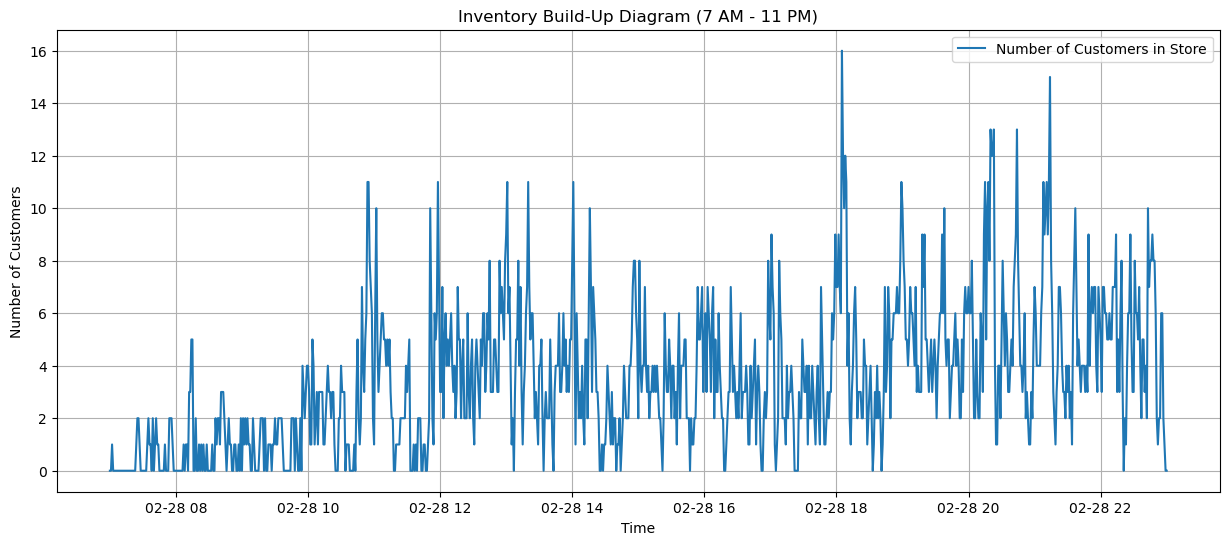

In [5]:
# Filter data for the relevant time period
data['purchase_datetime'] = pd.to_datetime(data['purchase_datetime'])
start_time = datetime.strptime('2024-02-28 07:00', '%Y-%m-%d %H:%M')
end_time = datetime.strptime('2024-02-28 23:00', '%Y-%m-%d %H:%M')
filtered_data = data[(data['purchase_datetime'] >= start_time) & (data['purchase_datetime'] <= end_time)]

# Calculate entry time
filtered_data['entry_time'] = filtered_data['purchase_datetime'] - pd.to_timedelta(filtered_data['trip_duration_mins'], unit='m')

# Generate time range for every minute from 7:00 AM to 11:00 PM
time_range = pd.date_range(start=start_time, end=end_time, freq='T')
inventory_level = []

# Calculate inventory level at each minute
for current_time in time_range:
    num_customers = filtered_data[(filtered_data['entry_time'] <= current_time) & (filtered_data['purchase_datetime'] > current_time)]['session_id'].nunique()
    inventory_level.append(num_customers)

# Plot inventory build-up diagram
plt.figure(figsize=(15, 6))
plt.plot(time_range, inventory_level, label='Number of Customers in Store')
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.title('Inventory Build-Up Diagram (7 AM - 11 PM)')
plt.legend()
plt.grid(True)
plt.show()

Average Inventory Level: 3.478668054110302


/tmp/ipykernel_18138/1728409249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['interval'] = filtered_data['entry_time'].dt.floor('15T')


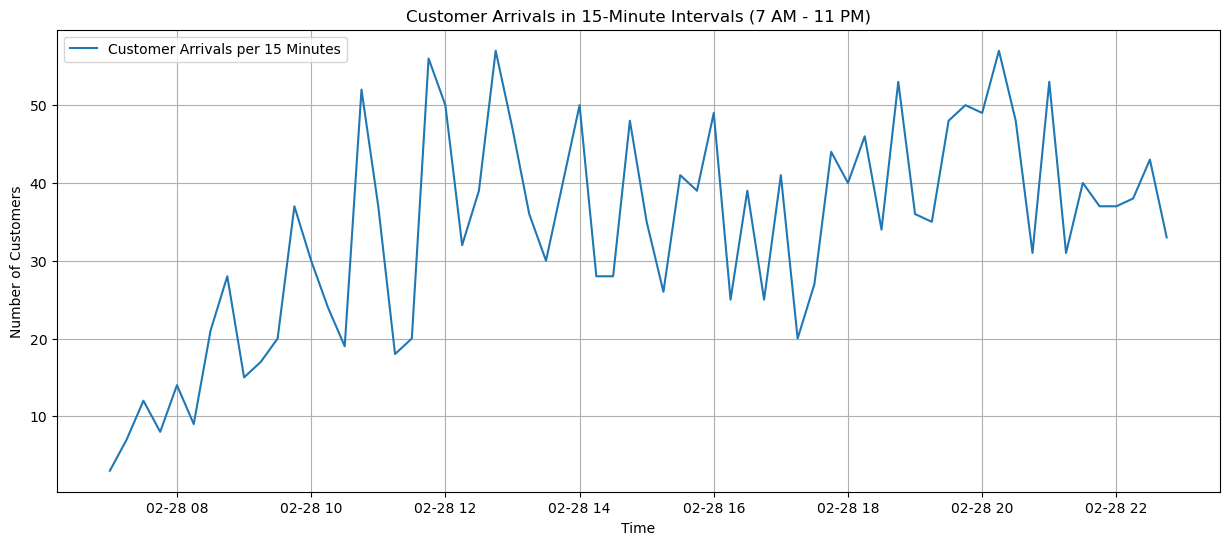

In [6]:
# Calculate average inventory level
average_inventory_level = sum(inventory_level) / len(inventory_level)
print("Average Inventory Level:", average_inventory_level)

# Set 15-minute intervals
filtered_data['interval'] = filtered_data['entry_time'].dt.floor('15T')

# Count unique sessions in each 15-minute interval
customer_arrivals = filtered_data.groupby('interval')['session_id'].nunique().reset_index()
customer_arrivals.columns = ['interval', 'num_customers']

# Plot customer arrivals in 15-minute intervals
plt.figure(figsize=(15, 6))
plt.plot(customer_arrivals['interval'], customer_arrivals['num_customers'], label='Customer Arrivals per 15 Minutes')
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.title('Customer Arrivals in 15-Minute Intervals (7 AM - 11 PM)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Calculate average number of customers entering the store per hour
total_customers = customer_arrivals['num_customers'].sum()
total_hours = (end_time - start_time).total_seconds() / 3600
average_customers_per_hour = total_customers / total_hours
print("Average Customers per Hour:", average_customers_per_hour)

# Calculate average trip duration considering the group size
average_trip_duration = (filtered_data['trip_duration_mins'] * filtered_data['group_size']).sum() / filtered_data['group_size'].sum()
print("Average Trip Duration:", average_trip_duration)

# Using Little's Law to calculate average flow time
L = average_inventory_level
λ = average_customers_per_hour
W = L / λ
print("Average Flow Time (Little's Law):", W)

# Verify calculations and data consistency
# Check for missing or inconsistent values in key columns
filtered_data[['purchase_datetime', 'trip_duration_mins', 'group_size']].describe(include='all')

# Recalculate with clean data if necessary
filtered_data_clean = filtered_data.dropna(subset=['trip_duration_mins', 'group_size'])

# Recalculate average trip duration considering the group size with clean data
average_trip_duration_clean = (filtered_data_clean['trip_duration_mins'] * filtered_data_clean['group_size']).sum() / filtered_data_clean['group_size'].sum()
print("Average Trip Duration (Clean Data):", average_trip_duration_clean)

# Recalculate using Little's Law with clean data
L_clean = average_inventory_level  # average inventory level remains the same
λ_clean = average_customers_per_hour  # average arrival rate remains the same
W_clean = L_clean / λ_clean  # recalculate average flow time
print("Average Flow Time (Little's Law, Clean Data):", W_clean)

Average Customers per Hour: 136.375
Average Trip Duration: 2.913368170377541
Average Flow Time (Little's Law): 0.025508106721248775
Average Trip Duration (Clean Data): 2.913368170377541
Average Flow Time (Little's Law, Clean Data): 0.025508106721248775
